# Final Project: Melanie Tzintzarova & Quincey Nielson
#### Topic: Deformation of the solid Earth under a load (Lingle & Clark, 1985)

# Introduction
Our project is based on the paper by Lingle & Clarke, which outlines Earth's response to ice melting and rising sea levels in the West Antarctic Ice Stream. The elastic response is the immediate, short-term deformation of Earth under the ice load. The viscous response is the slower, more long-term effects and adjustments due to the load. This paper is important to understand the feedback mechanisms between ice sheets and the solid Earth, which is increasingly relevant in a time where ice is melting at unprecedented rates.

In Lingle & Clark (1985), they model the net rate of thickening on the ice sheet's central flow line, which can then be used to model the rate of retreat of the grounding line. They then uses these thickness values to observe the rate of retreat for three different scenarios: rigid Earth, elastic Earth, and viscoelastic Earth. This differs from our project, which will focus on the net rate of thickening alone, which is dependent on the vertical strain rate.

A more advanced model is seen in Whitehouse et al. (2019), where they include more interactions that effect isostatic subsidence, including ice-sheet thickening and advance, subglagial volcanism, basal heat flux, and erosion and deposition of material offshore. Paxman et al. (2022) take a different approach, using compilations of ice thickness and the effective elastic thickness of the lithosphere to calculate the total isostatic response of the solid Earth were the Greenland and Antarctic Ice Sheets completely removed.

For our project, we plan to model the net rate of thickening on the ice sheet's central flow line in four scenarios: no ice shelf, ice shelf with effective stress of 0.065 N/m^2, ice shelf with effective stress of 0.065 N/m^2, and a future simulation for thickening from present time to 16,000 years in the future.

# Equations

The fundamental physical process behind our model is the thickening of the glacier on the central flow line of the ice sheet. This is controlled by the rate of accumulation or ablation (which is the increase or decrease of the size of the glacier due to deposition of snow and erosion of the glacier), the rate of advection of thicker ice from up-glacier, and the rate of creep thinning (caused by the ice shelf spreading). This relationship ship is shown in the equation:

####∂Hg/∂t = Ag - Vg * ∂Hg/∂x + Hg * εzz (1)

where Hg is the rate of thickening of the glacier, Ag is the rate of accumulation & ablation, Vg is the ice velocity, and εzz is the vertical strain rate. The subscript g means the position of the grounding line, and x is the horizonta distance from the ice divide to the central flow line. This equation is derived from basal sliding equations.

The vertical strain rate term seen in (1) is found using the forward driving stress causing the ice shelf to spread and the stress-reduction term/back stress acting on the sides of the ice shelf. This is shown with the equation:

####εzz = -(1/(2B))^3 * [(ρi*g*Hg)/2 * (1 - ρi/ρw) - (3τs*L)/(2wg)]^3  (2)

where B is the hardness parameter in the flow law of ice, ρi is the density of ice, ρw is the density of water, g is the acceleration due to gravity, τs is the effective stress, L is the length of the ice shelf, and wg is the width of the glacier. This equation is derived by ice sheet dynamic equations, assuming that the ice shelf is only able to spread in one direction because of lateral confinement.

Though this is outside the scope of our project, the rate of retreat of the grounding line can be found using the results of our model, with the equation:
#### ∂xg/∂t = ∂Hg/∂t * [1/((1-ρw/ρi)*β-α))]  (3)

where α and β are the angles between the ice stream and the glacier surface and grounding line respectively.


![](https://drive.google.com/uc?export=view&id=1BE3zgY86adQWP5y2munUpuJi-fZRvUtK)

For our parameters, ice velocity can vary from 100-1000 m/yr, so we set Vg to 400 m/yr. We set the rate of accumulation/ablation Ag to 1 m/yr, ice density ρi to 917 kg/m^3, water density ρw to 1000 kg/m^3, and hardness parameter B to <INSERT HERE>.

For our initial condition, we set Hg to be uniform at 1000 m at all locations along the grounding line. We make the simplification that the glacier has a uniform width, wg, and set that to 800 km which matches roughly the width of the Ross Ice Sheet in Antarctica. We chose to use a Dirichlet boundary, and set Hg to 0 at those locations because the ice sheet is constricted by rock on both sides in this model.

Our variables are length of the ice shelf, L, and effective stress, τs. For our model, we chose to use a no ice shelf scenario (L = 0), simulating a marine-terminating glacier, and a 600 km ice shelf scenario (L = 600e3). We then used the ice shelf scenario and varied τs for effective stresses of 0.062 N/m^2 (which was the value used by Lingle & Clark 1985) and 0.065 N/m^2 (which Lingle & Clark suggested may be a more accurate value to use). Finally, we used our code to simulate a continuation of thickening rate 16,000 years in the future.

[INFO ON TIME STEPS AND DX GOES HERE]

# Numerical Methods

We chose to use the Forward Euler method for our model, because this was the easiest model to try and we wanted to have time to focus on getting results that made physical sense, which we worried would require changing our initial conditions and parameters because they were not well-defined in the original paper, taking up more time.

We chose to use the Dirichlet Boundary Conditions over the Neumann Boundary Conditions, because Dirichlet allows us to explicitly set our boundary variables, whereas the Neumann Method would have us set the derivative of the boundary variable. Originally, we had set the boundaries to 0, thinking this was the correct way to implement the {!!!!FINISH AFTER DINNER!!!}We set the left and right boundary equal to one so that when matrix multiplication is done, we would have the proper initial conditions set to show in our plots.

Our model can be run using the cells below:

### 1) Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

### 2) Set parameters

In [ ]:
# EQUATION (1) CONSTANTS
Vg = 400 # ice velocity [m/yr] can be between 100-800 m/years
Ag = 0.1 # rate of accumulation/ablation [m/year]
Hg = 1000

# EQUATION (2) CONSTANTS
B = 120e3 # hardness parameter in the flow law of ice [N/m*s^2]
ro_i = 917 # density of ice [kg/m^3]
ro_w = 1000 # density of water [kg/m^3]
g = 9.81 # acceleration due to gravity [m/s^2]
wg = 800e3 # m

# VARIABLES
L1 = 0 # no ice shelf [m]
L2 = 600e3 # ice shelf [m]
tau1 = 65000 # effective stress [N/m^2]
tau2 = 62000 # effective stress [N/m^2]

# L2 = 10000

# SET X AND T VALUES
xi = 0 #initial distance
xf = 1000e3 # m
nx = 1000
dx = xf/nx
print(dx)

ti = -2200 # years
tf = 0 # years
nt = 1000
dt = -ti/nt # decrease dt
print(dt)

# CALCULATE COURANT NUMBER
Cr = (Vg*dt)/(dx)
print(Cr)

1000.0
2.2
0.8800000000000001


### 3) Pre-allocate vectors

In [ ]:
# CREATE HG AND T VECTORS
#xg_all = np.zeros([nx])

Hg_all = np.zeros([nx, nt])
times = np.arange(ti, tf, dt)
Ag_vec = np.ones(nx)*Ag
Ag_vec = Ag_vec.transpose()
Ag_vec[0] = 0
Ag_vec[-1] = 0


# CREATE INITIAL CONDITION
hi = 2.3e3 # thickness at top of glacier [m]
hf = 2e3 # thickness of Ross Ice Shelf (end of glacier) [m]
dh = (hi-hf)/nx
Hg_initial = []
h_count = hi
for i in Hg_all[:,0]:
  h_count -= dh
  Hg_initial += [h_count]

Hg_initial = np.array(Hg_initial)
Hg_all[:,0] = Hg_initial
Hg = Hg_all[:,0]
Ag_vec

array([0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.

### 4) Create matrix

In [ ]:
data = np.array([Cr*np.ones(nx), (1-Cr)*np.ones(nx)])
diags = np.array([-1,0])
M = spdiags(data, diags, nx, nx).toarray()
M

array([[0.12, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.88, 0.12, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.88, 0.12, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.88, 0.12]])

### 4) Boundary Conditions

In [ ]:
# APPLY DIRICHLET BOUNDARY
M[0,0] = 1 # Left Boundary
M[-1,-1] = 1 #Right Boundary
M[-1,-2] = 0
M

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.88, 0.12, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.88, 0.12, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

### 5) Create functions

In [ ]:
# FUNCTION FOR STRAIN RATE
def epsilon_zz(Hg_vec, tau, L):
  eps_vals = []
  for Hg in Hg_vec:
    eps = -((1/(2*B))**3)*(((ro_i*g*Hg)/2)*(1-(ro_i/ro_w))-((3*tau*L)/(2*wg)))**3
    eps_vals += [eps]
  eps_vals_array = np.array(eps_vals)
  return eps_vals_array

# FUNCTION FOR HG (MAY CUT)
def Hg_func(Hg_vec, Hgnew_vec, eps_vals_array, tau, L):
  new_Hg = []
  for i in np.arange(len(Hg_vec)):
    Hg_val = Ag - Vg*Hgnew_vec[i] + Hg_vec[i]*eps_vals_array[i]
    new_Hg += [Hg_val]
  new_Hg_array = np.array(new_Hg)
  return new_Hg_array



### 6) Solve

In [ ]:
# TESTING
eps_vals = -0.1589*np.ones(1000)

In [ ]:
counter = 1
for i in np.arange(999):
  Hg_new = np.matmul(M,Hg.transpose())
  #eps_vals = epsilon_zz(Hg,tau1,L1)
  Hg_newer = Ag_vec + Hg_new + Hg*eps_vals
  Hg_all[:,counter] = Hg_newer.transpose()
  Hg = Hg_newer
  counter += 1

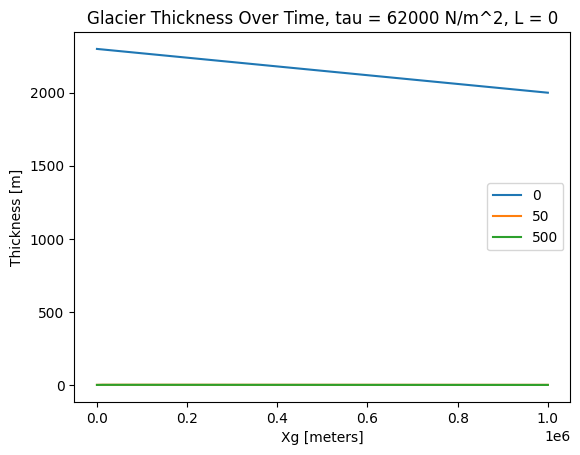

In [ ]:
x_domain = np.linspace(xi,xf,nx)
ts = np.linspace(tf,ti,nt)

#plt.plot(times, x_domain, Hg_all)
plt.plot(x_domain, Hg_all[:,0])
plt.plot(x_domain, Hg_all[:,50])
plt.plot(x_domain, Hg_all[:,500])
#plt.plot(x_domain, Hg_all[:,999])

#plt.plot(x_domain, Hg_all[500,:])
#plt.plot(x_domain, Hg_all[999,:])



plt.xlabel('Xg [meters]')
plt.ylabel('Thickness [m]')
plt.title('Glacier Thickness Over Time, tau = 62000 N/m^2, L = 0')
plt.legend(['0','50','500'])#,'999'])
#print(Hg_all[500,:])

In [ ]:
print(nx)

1000


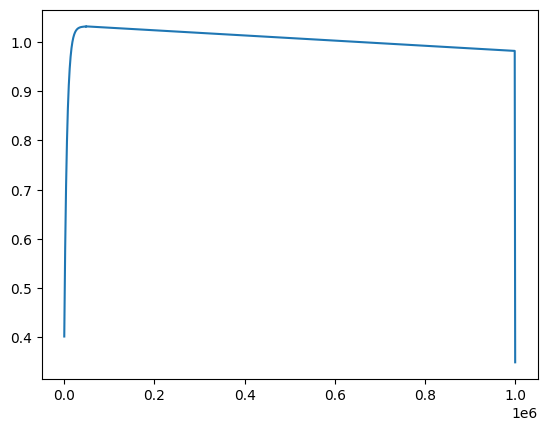

In [ ]:
plt.plot(x_domain, Hg_all[:,50])

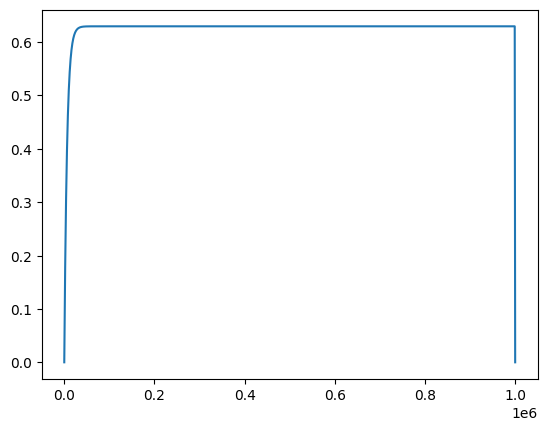

In [ ]:
plt.plot(x_domain, Hg_all[:,500])

# Results

# Figures
###Figure 1
#####Rate of Thickening WRT Time (Effective Stress = 0.065 N/m^2)

###Figure 2
#####Rate of Thickening WRT Time (Effective Stress = 0.062 N/m^2)

###Figure 3
#####Rate of Thickening WRT Time (No Ice Shelf)
#####16,000 years BP to Present

###Figure 4
#####Rate of Thickening WRT (No Ice Shelf)
#####Present - 16,000 years AP

In [ ]:
pyplot.plot(time, retreat_diff, label="Retreat Distance")
pyplot.xlabel("Time (years B.P.)")
pyplot.ylabel("Retreat Distance (km)")
pyplot.title("Grounding Line Rate of Retreat")

NameError: name 'pyplot' is not defined

# References

Beget, J. (1987). Low Profile of the Northwest Laurentide Ice Sheet. Arctic and Alpine Research, 19(1), 81–88. https://doi.org/10.2307/1551003.

Lingle, C.S., & Clark, J.A. A numerical model of interactions between a marine ice sheet and the solid earth: Application to a West Antarctic ice stream. Journal of Geophysical Research: Oceans. Vol 90, Iss C1 (1985). https://doi.org/10.1029/JC090iC01p01100.

Paxman, G.J.G., Austermann, J. & Hollyday, A. Total isostatic response to the complete unloading of the Greenland and Antarctic Ice Sheets. Sci Rep 12, 11399 (2022). https://doi.org/10.1038/s41598-022-15440-y.

Whitehouse, P.L., Gomez, N., King, M.A. et al. Solid Earth change and the evolution of the Antarctic Ice Sheet. Nat Commun 10, 503 (2019). https://doi.org/10.1038/s41467-018-08068-y.



2.2


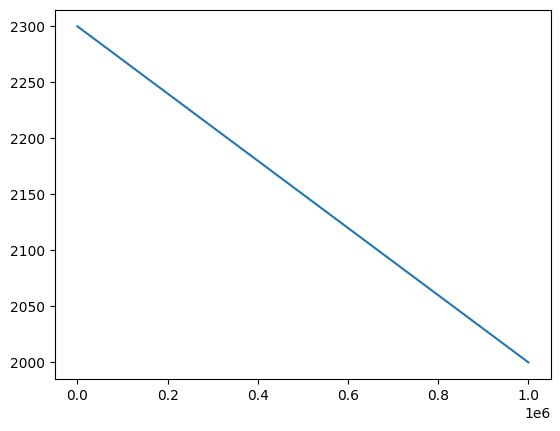

In [ ]:


ti = 0 # years
tf = 2200 # years
nt = 1000
dt = tf/nt # decrease dt
print(dt)

x_domain = np.linspace(xi,xf,nx)
ts = np.linspace(ti,tf,nt)

#plt.plot(times, x_domain, Hg_all)
plt.plot(x_domain, Hg_all[:,0])